<a href="https://colab.research.google.com/github/ramjitampan/pyton_Ramzy/blob/main/soalNomor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install seaborn matplotlib pandas numpy


In [55]:
#Ramzy Junfaris Hamonangan
#Tugas ujian Tengah Semester
#Inf1.62.24011
#P.Saintifik (087)
#23343015
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [56]:
# 1. Membaca dataset
try:
    df = pd.read_csv('/content/sample_data/epidemiology.csv', parse_dates=['date'])
    print("✅ Data berhasil dimuat. Berikut 5 baris pertama:")
    print(df.head())
except FileNotFoundError:
    print("❌ File 'epidemiologi.csv' tidak ditemukan. Pastikan file ada di direktori yang sama.")
    exit()


✅ Data berhasil dimuat. Berikut 5 baris pertama:
        date location_key  new_confirmed  new_deceased  new_recovered  \
0 2020-01-01           AD            0.0           0.0            NaN   
1 2020-01-02           AD            0.0           0.0            NaN   
2 2020-01-03           AD            0.0           0.0            NaN   
3 2020-01-04           AD            0.0           0.0            NaN   
4 2020-01-05           AD            0.0           0.0            NaN   

   new_tested  cumulative_confirmed  cumulative_deceased  \
0         NaN                   0.0                  0.0   
1         NaN                   0.0                  0.0   
2         NaN                   0.0                  0.0   
3         NaN                   0.0                  0.0   
4         NaN                   0.0                  0.0   

   cumulative_recovered  cumulative_tested  
0                   NaN                NaN  
1                   NaN                NaN  
2               

In [57]:
# 2. Analisis dasar
print("\n=== ℹ️ Informasi Dataset ===")
print(df.info())

print("\n=== 📊 Statistik Deskriptif ===")
print(df.select_dtypes(include='number').describe())
print(f"\nTanggal dari {df['date'].min()} sampai {df['date'].max()}")

print("\n=== 🧩 Nilai yang Hilang ===")
print(df.isnull().sum())


=== ℹ️ Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525825 entries, 0 to 12525824
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   date                  datetime64[ns]
 1   location_key          object        
 2   new_confirmed         float64       
 3   new_deceased          float64       
 4   new_recovered         float64       
 5   new_tested            float64       
 6   cumulative_confirmed  float64       
 7   cumulative_deceased   float64       
 8   cumulative_recovered  float64       
 9   cumulative_tested     float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 955.6+ MB
None

=== 📊 Statistik Deskriptif ===
       new_confirmed  new_deceased  new_recovered    new_tested  \
count   1.247580e+07  1.166714e+07   3.980462e+06  3.194489e+06   
mean    1.111905e+02  1.274817e+00   2.104549e+02  2.509508e+03   
std     1.165983e+04  8.808127e+01   1.8

In [58]:
# 3. Pembersihan data
df_clean = df.copy()

numeric_cols = [
    'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested',
    'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested'
]
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(0)
df_clean[numeric_cols] = df_clean[numeric_cols].astype('int64')

df_idn = df_clean[(df_clean['location_key'] == 'ID') & (df_clean['cumulative_confirmed'] > 0)].copy()
df_idn = df_idn.tail(5000)

In [59]:

# 4. Analisis tren waktu
if not df_idn.empty:
    df_idn['new_confirmed_7day_avg'] = df_idn['new_confirmed'].rolling(window=7).mean()
    df_idn['new_deceased_7day_avg'] = df_idn['new_deceased'].rolling(window=7).mean()

    df_idn['fatality_rate'] = df_idn.apply(
        lambda row: (row['cumulative_deceased'] / row['cumulative_confirmed'] * 100)
        if row['cumulative_confirmed'] > 0 else 0, axis=1
    )

<ipython-input-65-2696220747>:53: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-65-2696220747>:53: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-65-2696220747>:53: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-65-2696220747>:53: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-65-2696220747>:54: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig('covid_analysis_idn.png', dpi=300)
<ipython-input-65-2696220747>:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('covid_analysis_idn.png', dpi=300)
<ipython-input-65-2696220747>:54: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.savefig('covid_a


📸 Visualisasi disimpan sebagai 'covid_analysis_idn.png'


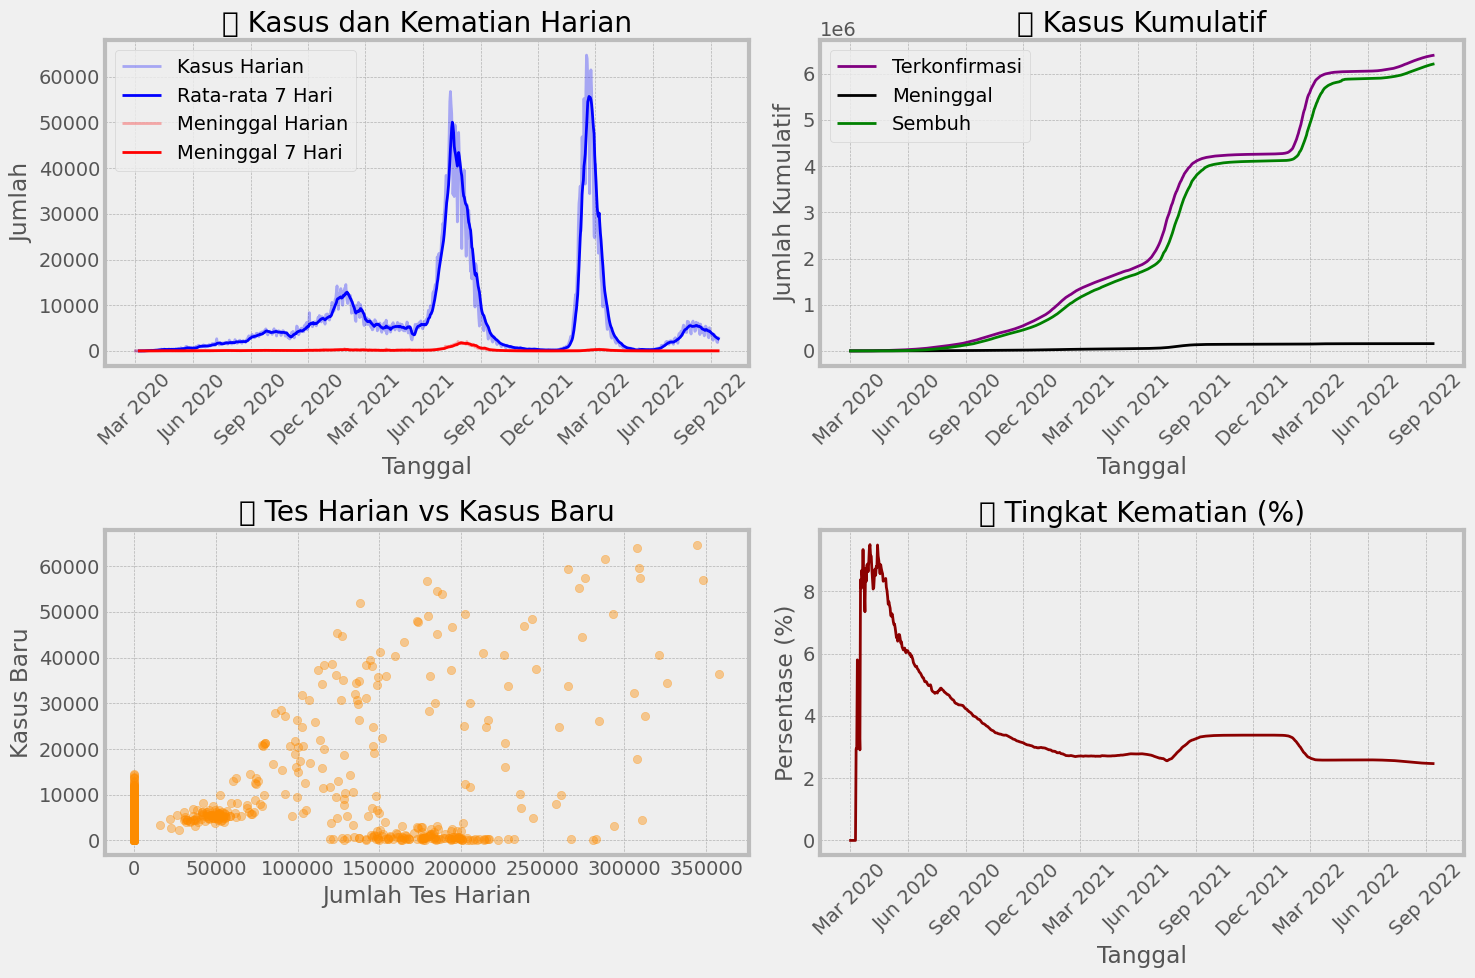

In [65]:
    # 5. Visualisasi data
    plt.figure(figsize=(15, 10))

    # Subplot 1
    plt.subplot(2, 2, 1)
    plt.plot(df_idn['date'], df_idn['new_confirmed'], color='blue', alpha=0.3, label='Kasus Harian')
    plt.plot(df_idn['date'], df_idn['new_confirmed_7day_avg'], color='blue', label='Rata-rata 7 Hari')
    plt.plot(df_idn['date'], df_idn['new_deceased'], color='red', alpha=0.3, label='Meninggal Harian')
    plt.plot(df_idn['date'], df_idn['new_deceased_7day_avg'], color='red', label='Meninggal 7 Hari')
    plt.title('📈 Kasus dan Kematian Harian')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah')
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.xticks(rotation=45)

    # Subplot 2
    plt.subplot(2, 2, 2)
    plt.plot(df_idn['date'], df_idn['cumulative_confirmed'], color='purple', label='Terkonfirmasi')
    plt.plot(df_idn['date'], df_idn['cumulative_deceased'], color='black', label='Meninggal')
    plt.plot(df_idn['date'], df_idn['cumulative_recovered'], color='green', label='Sembuh')
    plt.title('📊 Kasus Kumulatif')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Kumulatif')
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.xticks(rotation=45)

    # Subplot 3
    if df_idn['new_tested'].sum() > 0:
        plt.subplot(2, 2, 3)
        plt.scatter(df_idn['new_tested'], df_idn['new_confirmed'], alpha=0.4, color='darkorange')
        plt.title('🧪 Tes Harian vs Kasus Baru')
        plt.xlabel('Jumlah Tes Harian')
        plt.ylabel('Kasus Baru')
        plt.grid(True)

    # Subplot 4
    plt.subplot(2, 2, 4)
    plt.plot(df_idn['date'], df_idn['fatality_rate'], color='darkred')
    plt.title('💀 Tingkat Kematian (%)')
    plt.xlabel('Tanggal')
    plt.ylabel('Persentase (%)')
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig('covid_analysis_idn.png', dpi=300)
    print("\n📸 Visualisasi disimpan sebagai 'covid_analysis_idn.png'")
    plt.show()


In [66]:
# 6. Analisis tambahan
print("\n=== 🔍 Analisis Tambahan ===")
if not df_idn.empty:
    peak = df_idn.loc[df_idn['new_confirmed'].idxmax()]
    print(f"📅 Puncak kasus harian: {peak['new_confirmed']} pada {peak['date'].strftime('%d %B %Y')}")
    print(f"🧾 Total kasus: {df_idn['cumulative_confirmed'].iloc[-1]:,}")
    print(f"💀 Total kematian: {df_idn['cumulative_deceased'].iloc[-1]:,}")
    print(f"📉 Tingkat kematian keseluruhan: {df_idn['fatality_rate'].iloc[-1]:.2f}%")
else:
    print("⚠️ Tidak ada data valid untuk Indonesia.")



=== 🔍 Analisis Tambahan ===
📅 Puncak kasus harian: 64718 pada 16 February 2022
🧾 Total kasus: 6,402,686
💀 Total kematian: 157,849
📉 Tingkat kematian keseluruhan: 2.47%
